In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 7

In [3]:
def enlarge(x0):
    """ Extend the axis: enlarge(vector) """
    if isinstance(x0, list):
        x = np.array(x0)
    else:
        x = x0-0
    new_x = np.zeros(np.size(x)+1)
    new_x[1:-1] = (x[1:]+x[:-1])/2
    new_x[0] = 2*new_x[1]-new_x[2]
    new_x[-1] = 2*new_x[-2]-new_x[-3]
    return new_x

def make_theme(ax, case=1):
    """ Standard theme for plotting """
    for axis in ['top','bottom','left','right']: ax.spines[axis].set_linewidth(0.5)
    if case==1:
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax.tick_params(which='major', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=3)
        ax.tick_params(which='minor', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=1.5)
    elif case==2:
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax.tick_params(which='major', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=3)
        ax.tick_params(which='minor', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=1.5)

def get_color(color):
    """ produce colors for face, edge and line """
    fcolor = [color[0]*0.5+0.5, color[1]*0.5+0.5, color[2]*0.5+0.5, 1]
    ecolor = [color[0]*0.9, color[1]*0.9, color[2]*0.9, 1]
    lcolor = [color[0]*0.8, color[1]*0.8, color[2]*0.8, 1]
    return ecolor, fcolor, lcolor

def plot_raw(data, fit, ax, dzorder=0, color=[0,0,0,1], yshift=0.,
             fmt='o', ms=4, mew=0.5, ls='none', lw=0.5, elinewidth=0.5):
    """ plot raw data along with fitting """
    ecolor, fcolor, lcolor = get_color(color)
    
    # data
    ax.errorbar(data[:,0], data[:,1]+yshift, yerr=data[:,2], mfc=fcolor, mec=ecolor, ecolor=ecolor, zorder=dzorder,
                fmt=fmt, ms=ms, mew=mew, ls=ls, lw=lw, elinewidth=elinewidth)
    # fits
    ax.plot(fit[:,0], np.sum(fit[:,1:], axis=1)+yshift, '-', color=lcolor, lw=1, zorder=dzorder+1)
    ax.plot(fit[:,0], fit[:,1]+yshift, '--', color='grey', lw=0.5, zorder=dzorder+2)
    ax.plot(fit[:,0], fit[:,2]+yshift, '--', color='C3', lw=0.5, zorder=dzorder+3)
    ax.plot(fit[:,0], fit[:,3]+yshift, '--', color='darkcyan', lw=0.5, zorder=dzorder+2)
    
def plot_mag(data, fit, ax, dzorder=0, color=[0,0,0,1], yshift=0.,
             fmt='o', ms=4, mew=0.5, ls='none', lw=0.5, elinewidth=0.5, normf=1, label=None):
    """ plot magnetic excitations """
    ecolor, fcolor, lcolor = get_color(color)
    ax.errorbar(data[:,0], (data[:,1]-np.interp(data[:,0], fit[:,0], fit[:,1]+fit[:,3])+yshift)/normf, yerr=data[:,2]/normf,
                mfc=fcolor, mec=ecolor, ecolor=ecolor, zorder=dzorder,
                fmt=fmt, ms=ms, mew=mew, ls=ls, lw=lw, elinewidth=elinewidth, label=label)

def plot_CSX(data, fit, ax, dzorder=0, color=[0,0,0,1], fmt='o', ms=2, label=''):
    ecolor, fcolor, lcolor = get_color(color)
    
    ax.plot(data[:,0], data[:,1], marker=fmt, ms=3, mew=0.5, ls='none', mfc=fcolor, mec=ecolor, zorder=dzorder, label=label)
    ax.plot(fit[:,0], fit[:,1], '--', lw=0.5, color='gray', zorder=dzorder-1)
    ax.fill_between(fit[:,0], fit[:,1]+fit[:,2], fit[:,1], lw=0, color='gray', zorder=dzorder-2, alpha=0.2)
    if fit.shape[1]==4:
        ax.plot(fit[:,0], fit[:,3]+fit[:,1], '--', color='k', lw=0.5, zorder=dzorder+3)
    ax.plot(fit[:,0], np.sum(fit[:,1:], axis=1), '-', color=lcolor, lw=1, zorder=dzorder+1)

def plot_label(ax, count, x=0, y=1.03, color='k'):
    ax.text(x, y, count, fontdict=dict(fontsize=9), transform=ax.transAxes, color=color)

# Figure 1
- Load data

In [4]:
data_dd_lowE  = np.loadtxt('RIXS_data/dd_x0.00_T8_Q(7.5,-7.5,0.5)_LowEpart.txt')
data_dd_highE = np.loadtxt('RIXS_data/dd_x0.00_T8_Q(7.5,-7.5,0.5)_HighEpart.txt')
fit_dd_lowE   = np.loadtxt('RIXS_fit/dd_x0.00_T8_Q(7.5,-7.5,0.5)_LowEpart.txt')
fit_dd_highE  = np.loadtxt('RIXS_fit/dd_x0.00_T8_Q(7.5,-7.5,0.5)_HighEpart.txt')

- Plot data

Text(3.8, 1, '$t_{2g}$-$e_g$')

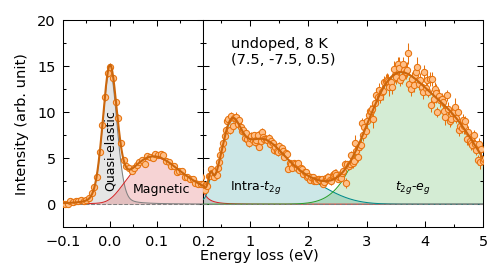

In [5]:
plot_params = dict(fmt='o', ms=3, mew=0.5, ls='none', elinewidth=0.5)
ecolor, fcolor, lcolor = get_color(mcolors.to_rgba('C1'))

fig, axs = plt.subplots(1, 2, figsize=(6.75/2,6.75/4), dpi=150, sharey=True,
                        gridspec_kw=dict(wspace=0., width_ratios=[0.5,1], left=0.12, right=0.95, top=0.97, bottom=0.15))

# Low energy part
## data
axs[0].errorbar(data_dd_lowE[:,0], data_dd_lowE[:,1], yerr=data_dd_lowE[:,2],
                mfc=fcolor, mec=ecolor, ecolor=ecolor, zorder=10, **plot_params)
## fitting, all
axs[0].plot(fit_dd_lowE[:,0], np.sum(fit_dd_lowE[:,1:], axis=1), color=lcolor, lw=1, zorder=20)
## fitting, quasi-elastic
axs[0].plot(fit_dd_lowE[:,0], fit_dd_lowE[:,1], color='gray', lw=0.5, zorder=5)
axs[0].fill_between(fit_dd_lowE[:,0], fit_dd_lowE[:,1], color='gray', lw=0, zorder=1, alpha=0.2)
## fitting, magnetic
axs[0].plot(fit_dd_lowE[:,0], fit_dd_lowE[:,2], color='C3', lw=0.5, zorder=5)
axs[0].fill_between(fit_dd_lowE[:,0], fit_dd_lowE[:,2], color='C3', lw=0, zorder=1, alpha=0.2)

# High energy part
## data
axs[1].errorbar(data_dd_highE[:,0], data_dd_highE[:,1], yerr=data_dd_highE[:,2],
                mfc=fcolor, mec=ecolor, ecolor=ecolor, zorder=10, **plot_params)
## fitting, all
axs[1].plot(fit_dd_highE[:,0], np.sum(fit_dd_highE[:,1:], axis=1), color=lcolor, lw=1, zorder=20)
## fitting, magnetic
axs[1].plot(fit_dd_highE[:,0], fit_dd_highE[:,2], color='C3', lw=0.5, zorder=5)
axs[1].fill_between(fit_dd_highE[:,0], fit_dd_highE[:,2], color='C3', lw=0, zorder=1, alpha=0.2)
## fitting, intra-t2g
axs[1].plot(fit_dd_highE[:,0], fit_dd_highE[:,3], color='darkcyan', lw=0.5, zorder=5)
axs[1].fill_between(fit_dd_highE[:,0], fit_dd_highE[:,3], color='darkcyan', lw=0, zorder=1, alpha=0.2)
## fitting, t2g to eg
axs[1].plot(fit_dd_highE[:,0], fit_dd_highE[:,4], color='C2', lw=0.5, zorder=5)
axs[1].fill_between(fit_dd_highE[:,0], fit_dd_highE[:,4], color='C2', lw=0, zorder=1, alpha=0.2)

# axis control
for ax in axs: make_theme(ax, case=1)
axs[0].axhline(y=0, lw=0.5, color='grey', ls='--', zorder=7)
axs[1].axhline(y=0, lw=0.5, color='grey', ls='--', zorder=7)

axs[0].set_xlim(-0.1, 0.2)
axs[1].set_xlim(0.2,5)
axs[0].set_ylim(-2.5,20)
axs[0].set_xticks(np.arange(-0.1,0.2,0.1))
axs[0].set_yticks(np.arange(0,21,5))
axs[1].set_xlabel('Energy loss (eV)')
axs[1].xaxis.set_label_coords(0.2, -0.1)
axs[0].set_ylabel('Intensity (arb. unit)')

axs[1].text(0.1, 0.85, 'undoped, 8 K\n(7.5, -7.5, 0.5)', transform=axs[1].transAxes,
            horizontalalignment='left', verticalalignment='center')
text_params = dict(fontdict=dict(fontsize=6), horizontalalignment='center', verticalalignment='bottom')
axs[0].text(0, 1.5, 'Quasi-elastic', rotation=90, **text_params)
axs[0].text(0.11, 1, 'Magnetic', **text_params)
axs[1].text(1.1, 1, 'Intra-$t_{2g}$', **text_params)
axs[1].text(3.8, 1, '$t_{2g}$-$e_g$', **text_params)

# Figure 2
- Load data

In [6]:
# Hdisp
data_undoped_Hdisp_H = [6.7,6.9,7.1,7.3,7.5]
data_undoped_Hdisp   = [np.loadtxt(f'RIXS_data/Hdisp_x0.00_T8_Q({H:.2f},-7.50,0.50).txt') for H in data_undoped_Hdisp_H]
fit_undoped_Hdisp    = [np.loadtxt(f'RIXS_fit/Hdisp_x0.00_T8_Q({H:.2f},-7.50,0.50).txt') for H in data_undoped_Hdisp_H]
# Kdisp
data_undoped_Kdisp_K = [-8,-7.8,-7.6,-7.4,-7.2,-7]
data_undoped_Kdisp   = [np.loadtxt(f'RIXS_data/Kdisp_x0.00_T8_Q(7.50,{K:.2f},0.50).txt') for K in data_undoped_Kdisp_K]
fit_undoped_Kdisp    = [np.loadtxt(f'RIXS_fit/Kdisp_x0.00_T8_Q(7.50,{K:.2f},0.50).txt') for K in data_undoped_Kdisp_K]
# Ldisp
data_undoped_Ldisp_L = np.hstack([np.arange(-0.5,0,0.1), np.arange(0,1.01,0.05)])
data_undoped_Ldisp   = [np.loadtxt(f'RIXS_data/Ldisp_x0.00_T8_Q(7.50,-7.50,{L:.2f}).txt') for L in data_undoped_Ldisp_L]
fit_undoped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.00_T8_Q(7.50,-7.50,{L:.2f}).txt') for L in data_undoped_Ldisp_L]
# spinon
spinon_boundary = np.loadtxt('calculation/calc_Bethe_ansatz_boundary.txt')
spinon_spectra  = dict(np.load('calculation/calc_Bethe_ansatz.npz'))

- Plot data

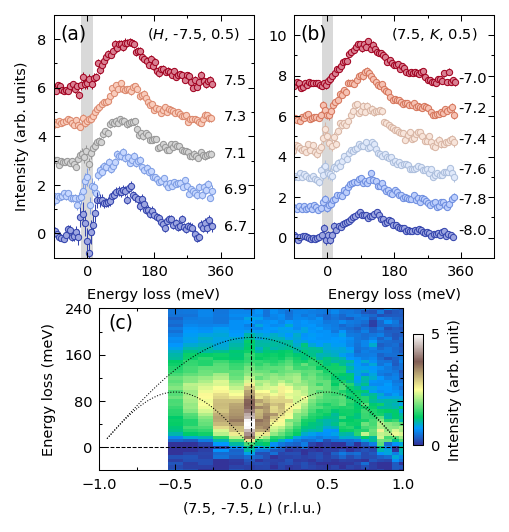

In [7]:
plot_params = dict(fmt='o', mew=0.5, ms=3, ls='none', elinewidth=0.5)
line_params = dict(lw=1)
emap_params = dict(eloss=np.arange(-100*1.14,300,5*1.14), cmap='terrain')

fig = plt.figure(figsize=(6.75/2,6.75/2), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=2, left=0.11, right=0.98, top=0.98, bottom=0.5, wspace=0.2)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.2, right=0.8, top=0.4, bottom=0.08)
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.82, right=0.84, top=0.4-0.05, bottom=0.08+0.05)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]

# Hdisp
ax = axs[0]
colors = plt.cm.coolwarm(np.linspace(0,1,5))
colors[2] = mcolors.to_rgba('darkgrey')
yshift = 1.5
for ndata, (H, data, fit, color) in enumerate(zip(data_undoped_Hdisp_H, data_undoped_Hdisp, fit_undoped_Hdisp, colors)):
    plot_mag(data, fit, ax, color=color, yshift=yshift*ndata, dzorder=-ndata*2, **plot_params)
    ax.text(430, yshift*ndata, f'{H:.1f}', horizontalalignment='right', verticalalignment='bottom', color='k')

# Kdisp
ax = axs[1]
colors = plt.cm.coolwarm(np.linspace(0,1,6))
yshift = 1.5
for ndata, (K, data, fit, color) in enumerate(zip(data_undoped_Kdisp_K, data_undoped_Kdisp, fit_undoped_Kdisp, colors)):
    plot_mag(data, fit, ax, color=color, yshift=yshift*ndata, dzorder=-ndata*2, **plot_params)
    ax.text(430, yshift*ndata, f'{K:.1f}', horizontalalignment='right', verticalalignment='bottom', color='k')

# Ldisp
ax = axs[2]
eloss = np.arange(-100,300,5) * 1.14
I = np.vstack([np.interp(eloss, data[:,0], data[:,1]) - np.interp(eloss, fit[:,0], fit[:,1]+fit[:,3])
     for data, fit in zip(data_undoped_Ldisp, fit_undoped_Ldisp)]).T
art = ax.pcolormesh(enlarge(data_undoped_Ldisp_L), enlarge(eloss), I, cmap='terrain', vmin=0, vmax=5, rasterized=True)
cbar = plt.colorbar(art, shrink=0.5, cax=axs[-1])
ax.plot(spinon_boundary[:,0], spinon_boundary[:,1],':k', lw=0.5)
ax.plot(spinon_boundary[:,0], spinon_boundary[:,2],':k', lw=0.5)

# axis control
for ax in axs[:-1]: make_theme(ax, case=1)
axs[-1].tick_params(which='major', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=2)

axs[0].set_xlim(-90, 450)
axs[0].set_ylim(-1,9)
axs[0].set_xticks(np.arange(0,450,180))
axs[0].set_yticks(np.arange(0,9,2))
axs[0].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[0].text(0.7, 0.92, r'($H$, -7.5, 0.5)', transform=axs[0].transAxes,
            horizontalalignment='center', verticalalignment='center')
r1 = patches.Rectangle((-16,-1), 32, 10, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[0].add_patch(r1)
plot_label(axs[0], '(a)', x=0.03, y=0.9, color='k')

axs[1].set_xlim(-90, 450)
axs[1].set_ylim(-1, 11)
axs[1].set_xticks(np.arange(0,450,180))
axs[1].set_yticks(np.arange(0,11,2))
axs[1].set_xlabel('Energy loss (meV)')
axs[1].text(0.7, 0.92, r'(7.5, $K$, 0.5)', transform=axs[1].transAxes,
            horizontalalignment='center', verticalalignment='center')
r1 = patches.Rectangle((-16,-1), 32, 12, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[1].add_patch(r1)
plot_label(axs[1], '(b)', x=0.03, y=0.9, color='k')

axs[2].set_xlim(-1.,1.)
axs[2].set_ylim(-40,240)
axs[2].set_xticks(np.arange(-1,1.1,0.5))
axs[2].set_yticks(np.arange(0,241,80))
axs[2].set_xlabel(r'(7.5, -7.5, $L$) (r.l.u.)')
axs[2].set_ylabel('Energy loss (meV)')
axs[2].axhline(y=0, lw=0.5, ls='--', color='k')
axs[2].axvline(x=0, lw=0.5, ls='--', color='k')
plot_label(axs[2], '(c)', x=0.03, y=0.88, color='k')

cbar.set_ticks([0,5])
cbar.set_label('Intensity (arb. unit)')
cbar.outline.set_linewidth(0.5)

# Figure 3
- Load data

In [8]:
# REXS
CSX_Ts = [25,35,60,100,115,130,150]
data_CSX_Qscans = [np.loadtxt(f'REXS_data/Qscan_E527_T{T:d}.txt') for T in CSX_Ts]
fit_CSX_Qscans  = [np.loadtxt(f'REXS_fit/Qscan_E527_T{T:d}.txt') for T in CSX_Ts]
all_fit_results = np.loadtxt('REXS_fit/all_fit_results.txt')
order_parameter = np.loadtxt('REXS_fit/Ei527_order_parameter_fit.txt')
# Hdisp
data_doped_Hdisp_H = [3.15,3.65,4.15]
data_doped_Hdisp   = [np.loadtxt(f'RIXS_data/Hdisp_x0.02_T8_Q({H:.2f},15.00,-1.00).txt') for H in data_doped_Hdisp_H]
fit_doped_Hdisp    = [np.loadtxt(f'RIXS_fit/Hdisp_x0.02_T8_Q({H:.2f},15.00,-1.00).txt') for H in data_doped_Hdisp_H]
# Kdisp
data_doped_Kdisp_K = [15.5,15.8,16.5]
data_doped_Kdisp   = [np.loadtxt(f'RIXS_data/Kdisp_x0.02_T8_Q(3.50,{K:.2f},-1.00).txt') for K in data_doped_Kdisp_K]
fit_doped_Kdisp    = [np.loadtxt(f'RIXS_fit/Kdisp_x0.02_T8_Q(3.50,{K:.2f},-1.00).txt') for K in data_doped_Kdisp_K]
# Ldisp
data_doped_Ldisp_L = np.arange(-1.1,0.25,0.1)
data_doped_Ldisp   = [np.loadtxt(f'RIXS_data/Ldisp_x0.02_T8_Q(3.50,15.50,{L:.2f}).txt') for L in data_doped_Ldisp_L]
fit_doped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.02_T8_Q(3.50,15.50,{L:.2f}).txt') for L in data_doped_Ldisp_L]
# high T
data_highT   = [np.loadtxt('RIXS_data/Ldisp_x0.02_T150_Q(3.50,15.50,-1.00).txt'),
                np.loadtxt('RIXS_data/Ldisp_x0.02_T150_Q(3.50,15.50,-0.60).txt')]
fit_highT    = [np.loadtxt('RIXS_fit/Ldisp_x0.02_T150_Q(3.50,15.50,-1.00).txt'),
                np.loadtxt('RIXS_fit/Ldisp_x0.02_T150_Q(3.50,15.50,-0.60).txt')]
# undoped
data_undoped = [np.loadtxt('RIXS_data/Ldisp_x0.00_T8_Q(7.50,-7.50,0.00).txt'),
                np.loadtxt('RIXS_data/Ldisp_x0.00_T8_Q(7.50,-7.50,0.40).txt')]
fit_undoped  = [np.loadtxt('RIXS_fit/Ldisp_x0.00_T8_Q(7.50,-7.50,0.00).txt'),
                np.loadtxt('RIXS_fit/Ldisp_x0.00_T8_Q(7.50,-7.50,0.40).txt')]

- Plot data

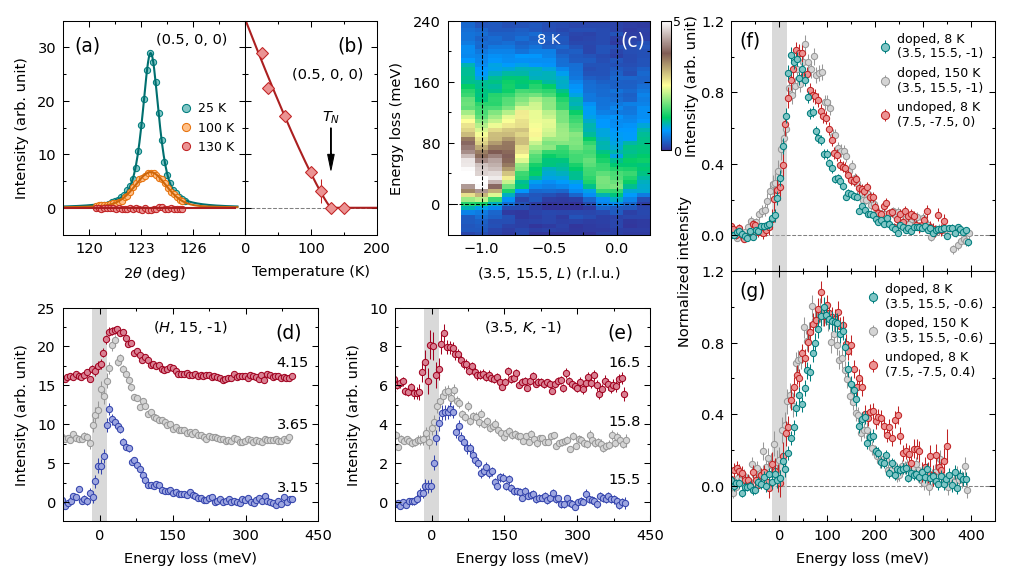

In [9]:
CSX_params = dict(marker='o', ms=3, mew=0.5, ls='none')
plot_params = dict(fmt='o', ms=3, mew=0.5, ls='none', elinewidth=0.5)

fig = plt.figure(figsize=(6.75,6.75/1.8), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.24, top=0.98, bottom=0.6)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.24, right=0.37, top=0.98, bottom=0.6)
gs3 = fig.add_gridspec(nrows=1, ncols=2, left=0.06, right=0.64, top=0.47, bottom=0.09, wspace=0.3)
gs4 = fig.add_gridspec(nrows=1, ncols=1, left=0.44, right=0.64, top=0.98, bottom=0.6)
gs5 = fig.add_gridspec(nrows=2, ncols=1, left=0.72, right=0.98, top=0.98, bottom=0.09, hspace=0.)
gs6 = fig.add_gridspec(nrows=1, ncols=1, left=0.65, right=0.66, top=0.98, bottom=0.6+0.15)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
axs += [fig.add_subplot(gs) for gs in gs3] + [fig.add_subplot(gs) for gs in gs4]
axs += [fig.add_subplot(gs) for gs in gs5] + [fig.add_subplot(gs) for gs in gs6]

# CSX Qscans
ax = axs[0]
scan_ids = [0,3,5]
colors = ['darkcyan','C1','C3']
for scan_id, color in zip(scan_ids,colors):
    data, fit = data_CSX_Qscans[scan_id], fit_CSX_Qscans[scan_id]
    ecolor, fcolor, lcolor = get_color(mcolors.to_rgba(color))
    ax.plot(data[:,0], data[:,1]-np.interp(data[:,0], fit[:,0], np.sum(fit[:,1:3], axis=1)),
            mfc=fcolor, mec=ecolor, label='{:d} K'.format(CSX_Ts[scan_id]), **CSX_params)
    ax.plot(fit[:,0], fit[:,3], '-', lw=1, color=lcolor)

# CSX Tdep
ax = axs[1]
choose = abs(all_fit_results[:,0]-527)<0.1
ecolor, fcolor, lcolor = get_color(mcolors.to_rgba('C3'))
ax.errorbar(all_fit_results[choose,1], all_fit_results[choose,-4], yerr=all_fit_results[choose,-3],
            fmt='D', ls='none', ms=4, mew=0.5, elinewidth=0.5, mfc=fcolor, mec=ecolor, ecolor=ecolor)
ax.plot(order_parameter[:,0], order_parameter[:,1], lw=1, color=lcolor)
ax.axhline(y=0, color='gray', ls='--', lw=0.5, zorder=-1)

# Hdisp
ax = axs[2]
colors = plt.cm.coolwarm(np.linspace(0,1,3))
colors[1] = mcolors.to_rgba('darkgrey')

yshift = 8
for ndata, (H, data, fit, color) in enumerate(zip(data_doped_Hdisp_H, data_doped_Hdisp, fit_doped_Hdisp, colors)):
    plot_mag(data, fit, ax, color=color, yshift=yshift*ndata, dzorder=-ndata*2, **plot_params)
    ax.text(430, yshift*ndata+1, f'{H:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

# Kdisp
ax = axs[3]
colors = plt.cm.coolwarm(np.linspace(0,1,3))
colors[1] = mcolors.to_rgba('darkgrey')

yshift = 3
for ndata, (K, data, fit, color) in enumerate(zip(data_doped_Kdisp_K, data_doped_Kdisp, fit_doped_Kdisp, colors)):
    plot_mag(data, fit, ax, color=color, yshift=yshift*ndata, dzorder=-ndata*2, **plot_params)
    ax.text(430, yshift*ndata+0.8, f'{K:.1f}', horizontalalignment='right', verticalalignment='bottom', color='k')

# Ldisp
ax = axs[4]
eloss = np.arange(-100,300,5) * 1.14
I = np.vstack([np.interp(eloss, data[:,0], data[:,1]) - np.interp(eloss, fit[:,0], fit[:,1]+fit[:,3])
     for data, fit in zip(data_doped_Ldisp, fit_doped_Ldisp)]).T
art = ax.pcolormesh(enlarge(data_doped_Ldisp_L), enlarge(eloss), I/3., cmap='terrain', vmin=0, vmax=5, rasterized=True)
cbar = plt.colorbar(art, shrink=0.5, cax=axs[-1])

# comparison
ax = axs[5]
plot_mag(data_doped_Ldisp[1], fit_doped_Ldisp[1], ax, color=mcolors.to_rgba('darkcyan'),
         normf=np.max(fit_doped_Ldisp[1][:,2]), dzorder=0, **plot_params, label='doped, 8 K\n(3.5, 15.5, -1)')
plot_mag(data_highT[0], fit_highT[0], ax, color=mcolors.to_rgba('darkgray'),
         normf=np.max(fit_highT[0][:,2]), dzorder=-8, **plot_params, label='doped, 150 K\n(3.5, 15.5, -1)')
plot_mag(data_undoped[0], fit_undoped[0], ax, color=mcolors.to_rgba('C3'),
         normf=np.max(fit_undoped[0][:,2]), dzorder=-4, **plot_params, label='undoped, 8 K\n(7.5, -7.5, 0)')

# comparison
ax = axs[6]
plot_mag(data_doped_Ldisp[5], fit_doped_Ldisp[5], ax, color=mcolors.to_rgba('darkcyan'),
         normf=np.max(fit_doped_Ldisp[5][:,2]), dzorder=0, **plot_params, label='doped, 8 K\n(3.5, 15.5, -0.6)')
plot_mag(data_highT[1], fit_highT[1], ax, color=mcolors.to_rgba('darkgray'),
         normf=np.max(fit_highT[1][:,2]), dzorder=-8, **plot_params, label='doped, 150 K\n(3.5, 15.5, -0.6)')
plot_mag(data_undoped[1], fit_undoped[1], ax, color=mcolors.to_rgba('C3'),
         normf=np.max(fit_undoped[1][:,2]), dzorder=-4, **plot_params, label='undoped, 8 K\n(7.5, -7.5, 0.4)')

# axis control
for ax in axs[:-1]: make_theme(ax, case=1)
axs[-1].tick_params(which='major', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=2)

axs[0].set_xlim(118.5,129)
axs[0].set_ylim(-5,35)
axs[0].set_xticks(np.arange(120,128,3))
axs[0].set_yticks(np.arange(0,35,10))
axs[0].set_xlabel(r'$2\theta$ (deg)')
# axs[0].xaxis.labelpad = 0.1
axs[0].set_ylabel('Intensity (arb. unit)')
axs[0].text(0.9, 0.91, '(0.5, 0, 0)', transform=axs[0].transAxes,
            horizontalalignment='right', verticalalignment='center')
axs[0].legend(loc='center right', frameon=False, markerscale=1.3, handletextpad=0, fontsize=6)
plot_label(axs[0], '(a)', x=0.06, y=0.86, color='k')

axs[1].set_xlim(0,200)
axs[1].set_ylim(-5,35)
axs[1].set_xticks(np.arange(0,201,100))
axs[1].set_yticks(np.arange(0,35,10))
axs[1].tick_params(labelleft=False)
axs[1].set_xlabel('Temperature (K)')
axs[1].text(0.9, 0.75, '(0.5, 0, 0)', transform=axs[1].transAxes, horizontalalignment='right', verticalalignment='center')
axs[1].arrow(130, 15, 0, -5, lw=0.5, head_width=10, head_length=3, color='k')
axs[1].text(130, 17, r'$T_N$', horizontalalignment='center', verticalalignment='center')
plot_label(axs[1], '(b)', x=0.7, y=0.86, color='k')

axs[2].set_xlim(-75, 450)
axs[2].set_ylim(-2.5,25)
axs[2].set_xticks(np.arange(0,451,150))
axs[2].set_xlabel('Energy loss (meV)')
axs[2].set_ylabel('Intensity (arb. unit)')
axs[2].text(0.5, 0.91, r'($H$, 15, -1)', transform=axs[2].transAxes, horizontalalignment='center', verticalalignment='center')
r1 = patches.Rectangle((-16,-2.5), 32, 27.5, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[2].add_patch(r1)
plot_label(axs[2], '(d)', x=0.83, y=0.86, color='k')

axs[3].set_xlim(-75, 450)
axs[3].set_ylim(-1, 10)
axs[3].set_xticks(np.arange(0,451,150))
axs[3].set_xlabel('Energy loss (meV)')
axs[3].set_ylabel('Intensity (arb. unit)')
axs[3].text(0.5, 0.91, r'(3.5, $K$, -1)', transform=axs[3].transAxes, horizontalalignment='center', verticalalignment='center')
r1 = patches.Rectangle((-16,-1), 32, 11, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[3].add_patch(r1)
plot_label(axs[3], '(e)', x=0.83, y=0.86, color='k')

axs[4].set_xlim(-1.25,0.25)
axs[4].set_ylim(-40,240)
axs[4].set_xticks(np.arange(-1,0.1,0.5))
axs[4].set_yticks(np.arange(0,241,80))
axs[4].set_xlabel(r'(3.5, 15.5, $L$) (r.l.u.)')
axs[4].set_ylabel('Energy loss (meV)')
axs[4].axhline(y=0, lw=0.5, ls='--', color='k')
axs[4].axvline(x=-1, lw=0.5, ls='--', color='k')
axs[4].axvline(x=0, lw=0.5, ls='--', color='k')
axs[4].text(0.5, 0.91, r'8 K', color='w', transform=axs[4].transAxes, horizontalalignment='center', verticalalignment='center')
plot_label(axs[4], '(c)', x=0.85, y=0.88, color='w')

axs[5].set_xlim(-100, 450)
axs[5].set_ylim(-0.2, 1.2)
axs[5].set_xticks(np.arange(0,450,100))
axs[5].set_yticks(np.arange(0,1.3,0.4))
axs[5].set_ylabel('Normalized intensity')
axs[5].yaxis.set_label_coords(-0.15, 0)
axs[5].tick_params(labelbottom=False)
axs[5].axhline(y=0, ls='--', lw=0.5, color='gray', zorder=-999)
axs[5].legend(loc='upper right', frameon=False, markerscale=1.3, handletextpad=0, fontsize=6)
r1 = patches.Rectangle((-16,-0.2), 32, 1.4, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[5].add_patch(r1)
plot_label(axs[5], '(f)', x=0.03, y=0.9, color='k')

axs[6].set_xlim(-100, 450)
axs[6].set_ylim(-0.2, 1.2)
axs[6].set_xticks(np.arange(0,450,100))
axs[6].set_yticks(np.arange(0,1.3,0.4))
axs[6].set_xlabel('Energy loss (meV)')
axs[6].legend(loc='upper right', frameon=False, markerscale=1.3, handletextpad=0, fontsize=6)
axs[6].axhline(y=0, ls='--', lw=0.5, color='gray', zorder=-999)
r1 = patches.Rectangle((-16,-0.2), 32, 1.4, color=[180/255,180/255,180/255], alpha=0.5, lw=0, zorder=-999)
axs[6].add_patch(r1)
plot_label(axs[6], '(g)', x=0.03, y=0.9, color='k')

cbar.outline.set_linewidth(0.5)
cbar.set_ticks([0,5])
cbar.ax.tick_params(labelsize=6, pad=1) 
cbar.set_label('Intensity (arb. unit)', labelpad=2)

# Figure 4

In [10]:
Udd = 2.
Jdd = 0.3
delta = 0.
soc = 0.33
Vdds = np.arange(0.,1.01,0.01)

S12p, S12m, S32l, S32h = [], [], [], []
for Vdd in Vdds:
    data = np.load('calculation/evals_Udd_{:.2f}_Jdd_{:.2f}_delta_{:.2f}_soc_{:.2f}_Vdd_{:.2f}.npy'.format(
                        Udd, Jdd, delta, soc, Vdd))
    data = np.sort(data)[:8] - np.min(data)
    S32l.append(data[4])
    S32h.append(data[6])
    if Vdd<=0.795:
        S12m.append(data[0])
        S12p.append(data[2])
    else:
        S12m.append(data[2])
        S12p.append(data[0])

(-0.1, 1.1)

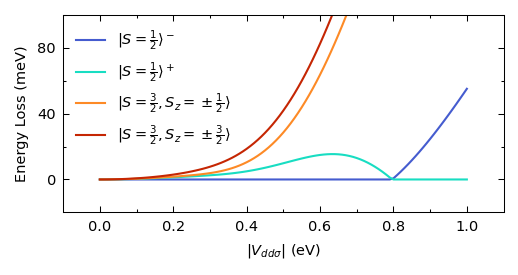

In [11]:
fig, ax = plt.subplots(figsize=(6.75/2,6.75/4), dpi=150, gridspec_kw=dict(left=0.11, right=0.98, top=0.98, bottom=0.2))

colors = plt.cm.turbo(np.linspace(0,1,20))
ax.plot(Vdds, np.array(S12m)*1e3, '-', lw=1, color=colors[2], label=r'$|S=\frac{1}{2}\rangle^-$')
ax.plot(Vdds, np.array(S12p)*1e3, '-', lw=1, color=colors[6], label=r'$|S=\frac{1}{2}\rangle^+$')
ax.plot(Vdds, np.array(S32l)*1e3, '-', lw=1, color=colors[14], label=r'$|S=\frac{3}{2}, S_z=\pm\frac{1}{2}\rangle$')
ax.plot(Vdds, np.array(S32h)*1e3, '-', lw=1, color=colors[17], label=r'$|S=\frac{3}{2}, S_z=\pm\frac{3}{2}\rangle$')

ax.set_ylabel('Energy Loss (meV)')
make_theme(ax)
ax.legend(frameon=False)
ax.set_xlabel('$|V_{dd\\sigma}|$ (eV)')
ax.set_ylim(-20,100)
ax.set_yticks(np.arange(0.,120,40))
ax.set_xlim(-0.1,1.1)

# Figure S1
- Load data

In [12]:
ccd_image = dict(np.load('REXS_data/representative_image.npz'))
Ts = [25,35,60,100,115,130,150]
data_E524_Qscans = [np.loadtxt(f'REXS_data/Qscan_E524_T{T:d}.txt') for T in Ts]
data_E527_Qscans = [np.loadtxt(f'REXS_data/Qscan_E527_T{T:d}.txt') for T in Ts]
fit_E524_Qscans  = [np.loadtxt(f'REXS_fit/Qscan_E524_T{T:d}.txt') for T in Ts]
fit_E527_Qscans  = [np.loadtxt(f'REXS_fit/Qscan_E527_T{T:d}.txt') for T in Ts]
Ts = [25,35,100,130]
data_Escans = [np.loadtxt(f'REXS_data/Escan_T{T}.txt') for T in Ts]

- Plot data

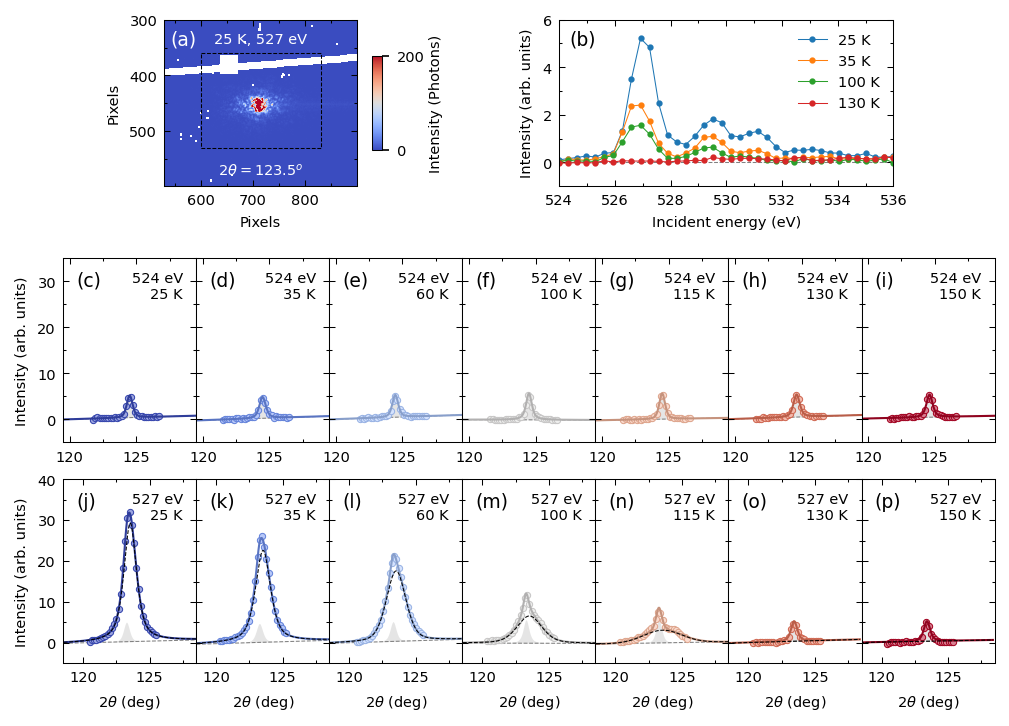

In [13]:
fig = plt.figure(figsize=(6.75,6.75/1.4), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.06+0.1, right=0.35, top=0.98, bottom=0.75)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.98-0.1, top=0.98, bottom=0.75)
gs3 = fig.add_gridspec(nrows=2, ncols=7, left=0.06, right=0.98, top=0.65, bottom=0.09, wspace=0., hspace=0.2)
gs4 = fig.add_gridspec(nrows=1, ncols=1, left=0.365, right=0.375, top=0.98-0.05, bottom=0.75+0.05)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
axs += [fig.add_subplot(gs) for gs in gs3] + [fig.add_subplot(gs) for gs in gs4]

### Representative detector image
ax = axs[0]
art = ax.imshow(ccd_image['image'], origin='lower', cmap='coolwarm', vmin=0, vmax=2e2, aspect='auto',
                extent=[ccd_image['cols'][0],ccd_image['cols'][-1],ccd_image['rows'][-1],ccd_image['rows'][0]])
cbar = plt.colorbar(art, shrink=0.8, cax=axs[-1])

### Escans
ax = axs[1]
for T, data in zip([25,35,100,130], data_Escans):
    ax.plot(data[:,0], data[:,1], 'o-', ms=2, lw=0.5, label=f'{T} K')

### Qscans
colors = plt.cm.coolwarm(np.linspace(0,1,7))
for data, fit, color, ax in zip(data_E524_Qscans, fit_E524_Qscans, colors, axs[2:9]):
    plot_CSX(data, fit, ax, dzorder=0, color=color)
for data, fit, color, ax in zip(data_E527_Qscans, fit_E527_Qscans, colors, axs[9:]):
    plot_CSX(data, fit, ax, dzorder=0, color=color)

### axis control
for ax in axs[:-1]: make_theme(ax, case=1)

axs[0].plot([600,830,830,600,600], [360,360,530,530,360], lw=0.5, color='k', ls='--')
axs[0].set_xlabel('Pixels')
axs[0].set_ylabel('Pixels')
axs[0].text(0.5, 0.88, '25 K, 527 eV', color='w', transform=axs[0].transAxes, horizontalalignment='center', verticalalignment='center')
axs[0].text(0.5, 0.1, r'2$\theta=$123.5$^o$', color='w', transform=axs[0].transAxes, horizontalalignment='center', verticalalignment='center')
plot_label(axs[0], '(a)', x=0.03, y=0.85, color='w')

axs[1].set_xlim(524,536)
axs[1].set_ylim(-1,6)
axs[1].set_xticks(np.arange(524,537,2))
axs[1].set_yticks(np.arange(0,7,2))
axs[1].set_xlabel('Incident energy (eV)')
axs[1].set_ylabel('Intensity (arb. units)')
axs[1].axhline(y=0, ls='--', color='grey', lw=0.5, zorder=-1)
axs[1].legend(loc='upper right', frameon=False)
plot_label(axs[1], '(b)', x=0.03, y=0.85, color='k')

labels = ['(c)','(d)','(e)','(f)','(g)','(h)','(i)']
for ax, label, T in zip(axs[2:9], labels, [25,35,60,100,115,130,150]):
    ax.set_xlim(119.5,129.5)
    ax.set_ylim(-5,35)
    ax.set_xticks([120,125])
    ax.text(0.9, 0.85, '524 eV\n{:.0f} K'.format(T), color='k', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center')
    plot_label(ax, label, x=0.1, y=0.85, color='k')

labels = ['(j)','(k)','(l)','(m)','(n)','(o)','(p)']
for ax, label, T in zip(axs[9:-1], labels, [25,35,60,100,115,130,150]):
    ax.set_xlim(118.5,128.5)
    ax.set_ylim(-5,40)
    ax.set_xticks([120,125])
    ax.set_xlabel(r'2$\theta$ (deg)')
    ax.text(0.9, 0.85, '527 eV\n{:.0f} K'.format(T), color='k', transform=ax.transAxes, horizontalalignment='right', verticalalignment='center')
    plot_label(ax, label, x=0.1, y=0.85, color='k')

for ax in axs[3:9]: ax.tick_params(labelleft=False)
for ax in axs[10:-1]: ax.tick_params(labelleft=False)
axs[2].set_ylabel('Intensity (arb. units)')
axs[9].set_ylabel('Intensity (arb. units)')

cbar.outline.set_linewidth(0.5)
cbar.set_ticks([0,200])
cbar.set_label('Intensity (Photons)', labelpad=2)

# Figure S2
- Load data

In [14]:
# Hdisp
data_undoped_Hdisp_H = [6.7,6.9,7.1,7.3,7.5]
data_undoped_Hdisp   = [np.loadtxt(f'RIXS_data/Hdisp_x0.00_T8_Q({H:.2f},-7.50,0.50).txt') for H in data_undoped_Hdisp_H]
fit_undoped_Hdisp    = [np.loadtxt(f'RIXS_fit/Hdisp_x0.00_T8_Q({H:.2f},-7.50,0.50).txt') for H in data_undoped_Hdisp_H]
# Kdisp
data_undoped_Kdisp_K = [-8,-7.8,-7.6,-7.4,-7.2,-7]
data_undoped_Kdisp   = [np.loadtxt(f'RIXS_data/Kdisp_x0.00_T8_Q(7.50,{K:.2f},0.50).txt') for K in data_undoped_Kdisp_K]
fit_undoped_Kdisp    = [np.loadtxt(f'RIXS_fit/Kdisp_x0.00_T8_Q(7.50,{K:.2f},0.50).txt') for K in data_undoped_Kdisp_K]
# Ldisp
data_undoped_Ldisp_L = np.hstack([np.arange(-0.5,0,0.1), np.arange(0,1.01,0.05)])
data_undoped_Ldisp   = [np.loadtxt(f'RIXS_data/Ldisp_x0.00_T8_Q(7.50,-7.50,{L:.2f}).txt') for L in data_undoped_Ldisp_L]
fit_undoped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.00_T8_Q(7.50,-7.50,{L:.2f}).txt') for L in data_undoped_Ldisp_L]

- Plot data

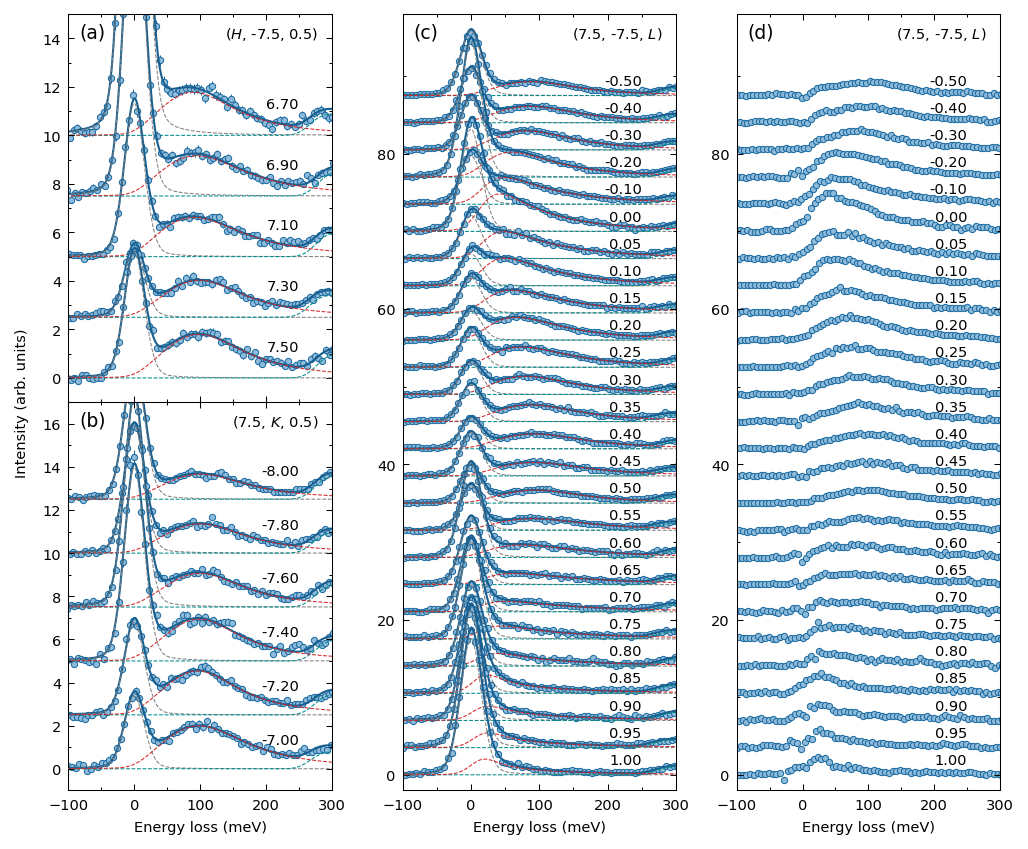

In [15]:
plot_params = dict(fmt='o', ms=3, mew=0.5, ls='none', lw=1, elinewidth=0.5)

fig = plt.figure(figsize=(6.75,6.75/1.2), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.32, top=0.98, bottom=0.52)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.32, top=0.52, bottom=0.06)
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.39, right=0.66, top=0.98, bottom=0.06)
gs4 = fig.add_gridspec(nrows=1, ncols=1, left=0.72, right=0.98, top=0.98, bottom=0.06)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
axs += [fig.add_subplot(gs) for gs in gs3] + [fig.add_subplot(gs) for gs in gs4]

### Hdisp
ax = axs[0]
yshift = 2.5
for ndata, (H, data, fit) in enumerate(zip(data_undoped_Hdisp_H[::-1], data_undoped_Hdisp[::-1], fit_undoped_Hdisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+1, f'{H:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

### Kdisp
ax = axs[1]
yshift = 2.5
for ndata, (K, data, fit) in enumerate(zip(data_undoped_Kdisp_K[::-1], data_undoped_Kdisp[::-1], fit_undoped_Kdisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+1, f'{K:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

### ldisp
ax = axs[2]
yshift = 3.5
for ndata, (L, data, fit) in enumerate(zip(data_undoped_Ldisp_L[::-1], data_undoped_Ldisp[::-1], fit_undoped_Ldisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+1, f'{L:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

ax = axs[3]
yshift = 3.5
for ndata, (L, data, fit) in enumerate(zip(data_undoped_Ldisp_L[::-1], data_undoped_Ldisp[::-1], fit_undoped_Ldisp[::-1])):
    plot_mag(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+1, f'{L:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')
    
### axis control
for ax in axs: make_theme(ax, case=1)

axs[0].set_xlim(-100,300)
axs[0].set_ylim(-1,15)
axs[0].set_xticks(np.arange(-100,301,100))
axs[0].set_ylabel('Intensity (arb. units)')
axs[0].yaxis.set_label_coords(-0.15, 0)
axs[0].tick_params(labelbottom=False)
axs[0].text(0.95, 0.95, r'($H$, -7.5, 0.5)', transform=axs[0].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[0], '(a)', x=0.04, y=0.94, color='k')

axs[1].set_xlim(-100,300)
axs[1].set_ylim(-1,17)
axs[1].set_xticks(np.arange(-100,301,100))
axs[1].set_xlabel('Energy loss (meV)')
axs[1].text(0.95, 0.95, r'(7.5, $K$, 0.5)', transform=axs[1].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[1], '(b)', x=0.04, y=0.94, color='k')

axs[2].set_xlim(-100,300)
axs[2].set_ylim(-2,98)
axs[2].set_xticks(np.arange(-100,301,100))
axs[2].set_xlabel('Energy loss (meV)')
axs[2].text(0.95, 0.975, r'(7.5, -7.5, $L$)', transform=axs[2].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[2], '(c)', x=0.04, y=0.97, color='k')

axs[3].set_xlim(-100,300)
axs[3].set_ylim(-2,98)
axs[3].set_xticks(np.arange(-100,301,100))
axs[3].set_xlabel('Energy loss (meV)')
axs[3].text(0.95, 0.975, r'(7.5, -7.5, $L$)', transform=axs[3].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[3], '(d)', x=0.04, y=0.97, color='k')

# Figure S3
- Load data

In [16]:
# Hdisp
data_doped_Hdisp_H = [3.15,3.65,4.15]
data_doped_Hdisp   = [np.loadtxt(f'RIXS_data/Hdisp_x0.02_T8_Q({H:.2f},15.00,-1.00).txt') for H in data_doped_Hdisp_H]
fit_doped_Hdisp    = [np.loadtxt(f'RIXS_fit/Hdisp_x0.02_T8_Q({H:.2f},15.00,-1.00).txt') for H in data_doped_Hdisp_H]
# Kdisp
data_doped_Kdisp_K = [15.5,15.8,16.5]
data_doped_Kdisp   = [np.loadtxt(f'RIXS_data/Kdisp_x0.02_T8_Q(3.50,{K:.2f},-1.00).txt') for K in data_doped_Kdisp_K]
fit_doped_Kdisp    = [np.loadtxt(f'RIXS_fit/Kdisp_x0.02_T8_Q(3.50,{K:.2f},-1.00).txt') for K in data_doped_Kdisp_K]
# Ldisp
data_doped_Ldisp_L = np.arange(-1.1,0.25,0.1)
data_doped_Ldisp   = [np.loadtxt(f'RIXS_data/Ldisp_x0.02_T8_Q(3.50,15.50,{L:.2f}).txt') for L in data_doped_Ldisp_L]
fit_doped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.02_T8_Q(3.50,15.50,{L:.2f}).txt') for L in data_doped_Ldisp_L]

- Plot data

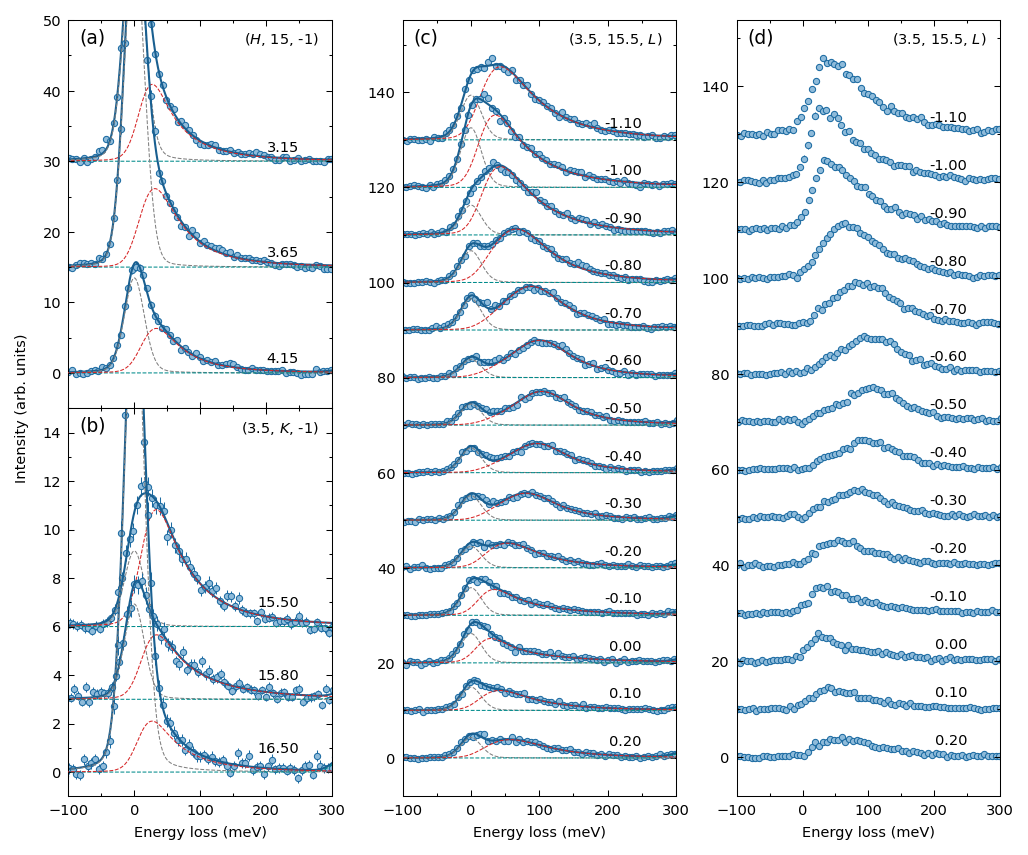

In [17]:
plot_params = dict(fmt='o', ms=3, mew=0.5, ls='none', lw=1, elinewidth=0.5)

fig = plt.figure(figsize=(6.75,6.75/1.2), dpi=150)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.32, top=0.98, bottom=0.52)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.06, right=0.32, top=0.52, bottom=0.06)
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.39, right=0.66, top=0.98, bottom=0.06)
gs4 = fig.add_gridspec(nrows=1, ncols=1, left=0.72, right=0.98, top=0.98, bottom=0.06)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
axs += [fig.add_subplot(gs) for gs in gs3] + [fig.add_subplot(gs) for gs in gs4]

### Hdisp
ax = axs[0]
yshift = 15
for ndata, (H, data, fit) in enumerate(zip(data_doped_Hdisp_H[::-1], data_doped_Hdisp[::-1], fit_doped_Hdisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+1, f'{H:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

### Kdisp
ax = axs[1]
yshift = 3
for ndata, (K, data, fit) in enumerate(zip(data_doped_Kdisp_K[::-1], data_doped_Kdisp[::-1], fit_doped_Kdisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+0.7, f'{K:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

### ldisp
ax = axs[2]
yshift = 10
for ndata, (L, data, fit) in enumerate(zip(data_doped_Ldisp_L[::-1], data_doped_Ldisp[::-1], fit_doped_Ldisp[::-1])):
    plot_raw(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+2, f'{L:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')

ax = axs[3]
yshift = 10
for ndata, (L, data, fit) in enumerate(zip(data_doped_Ldisp_L[::-1], data_doped_Ldisp[::-1], fit_doped_Ldisp[::-1])):
    plot_mag(data, fit, ax, color=mcolors.to_rgba('C0'), yshift=yshift*ndata, dzorder=-ndata*20, **plot_params)
    ax.text(250, yshift*ndata+2, f'{L:.2f}', horizontalalignment='right', verticalalignment='bottom', color='k')
    
### axis control
for ax in axs: make_theme(ax, case=1)

axs[0].set_xlim(-100,300)
axs[0].set_ylim(-5,50)
axs[0].set_xticks(np.arange(-100,301,100))
axs[0].set_ylabel('Intensity (arb. units)')
axs[0].yaxis.set_label_coords(-0.15, 0)
axs[0].tick_params(labelbottom=False)
axs[0].text(0.95, 0.95, r'($H$, 15, -1)', transform=axs[0].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[0], '(a)', x=0.04, y=0.94, color='k')

axs[1].set_xlim(-100,300)
axs[1].set_ylim(-1,15)
axs[1].set_xticks(np.arange(-100,301,100))
axs[1].set_xlabel('Energy loss (meV)')
axs[1].text(0.95, 0.95, r'(3.5, $K$, -1)', transform=axs[1].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[1], '(b)', x=0.04, y=0.94, color='k')

axs[2].set_xlim(-100,300)
axs[2].set_xticks(np.arange(-100,301,100))
axs[2].set_xlabel('Energy loss (meV)')
axs[2].text(0.95, 0.975, r'(3.5, 15.5, $L$)', transform=axs[2].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[2], '(c)', x=0.04, y=0.97, color='k')

axs[3].set_xlim(-100,300)
axs[3].set_xticks(np.arange(-100,301,100))
axs[3].set_xlabel('Energy loss (meV)')
axs[3].text(0.95, 0.975, r'(3.5, 15.5, $L$)', transform=axs[3].transAxes,
            horizontalalignment='right', verticalalignment='center')
plot_label(axs[3], '(d)', x=0.04, y=0.97, color='k')

# Figure S4
- Load data

In [18]:
# undoped
data_undoped_Ldisp_L = np.hstack([np.arange(-0.5,0,0.1), np.arange(0,1.01,0.05)])
fit_undoped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.00_T8_Q(7.50,-7.50,{L:.2f}).txt') for L in data_undoped_Ldisp_L]
# doped
data_doped_Ldisp_L = np.arange(-1.1,0.25,0.1)
fit_doped_Ldisp    = [np.loadtxt(f'RIXS_fit/Ldisp_x0.02_T8_Q(3.50,15.50,{L:.2f}).txt') for L in data_doped_Ldisp_L]

- Plot data

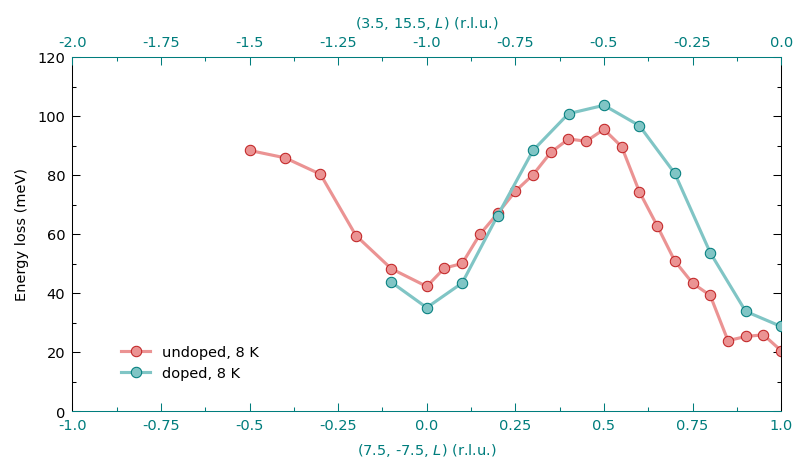

In [19]:
fig, ax1 = plt.subplots(figsize=(6.75,6.75/2), dpi=150, gridspec_kw=dict(left=0.2, right=0.9, top=0.85, bottom=0.15))
plot_params = dict(mew=0.5, ms=5, ls='-')
ax2 = ax1.twiny()

# undoped
ecolor, fcolor, lcolor = get_color(mcolors.to_rgba('C3'))
peaks = [fit[:,0][np.argmax(fit[:,2])] for fit in fit_undoped_Ldisp]
line1, = ax1.plot(data_undoped_Ldisp_L, peaks, 'o', color=fcolor, mec=ecolor, **plot_params)

# doped
ecolor, fcolor, lcolor = get_color(mcolors.to_rgba('darkcyan'))
peaks = [fit[:,0][np.argmax(fit[:,2])] for fit in fit_doped_Ldisp]
line2, = ax2.plot(data_doped_Ldisp_L, peaks, 'o', color=fcolor, mec=ecolor, **plot_params)

# axis control
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax1.tick_params(which='both', direction='in', left=True, bottom=True, top=False, right=True, width=0.5)
ax1.tick_params(which='both', axis='x', color=ecolor)
ax1.tick_params(which='major', length=4)
ax1.tick_params(which='minor', length=2)
for axis in ['bottom','left','right']: ax1.spines[axis].set_linewidth(0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color(ecolor)
ax1.set_xlim(-1,1)
ax1.set_ylim(0,120)
ax1.set_xticks(np.arange(-1,1.1,0.25))
ax1.set_yticks(np.arange(0,121,20))
ax1.set_xticklabels(np.arange(-1,1.1,0.25), color=ecolor)
ax1.set_xlabel('(7.5, -7.5, $L$) (r.l.u.)', color=ecolor)
ax1.set_ylabel('Energy loss (meV)')

ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax2.tick_params(which='both', direction='in', left=False, bottom=False, top=True, right=False, width=0.5)
ax2.tick_params(which='both', axis='x', color=ecolor)
ax2.tick_params(which='major', length=4)
ax2.tick_params(which='minor', length=2)
ax2.spines['top'].set_linewidth(0.5)
for axis in ['bottom','left','right']: ax2.spines[axis].set_visible(False)
ax2.spines['top'].set_color(ecolor)
ax2.set_xlim(-2,0)
ax2.set_xticks(np.arange(-2,0.1,0.25))
ax2.set_xticklabels(np.arange(-2,0.1,0.25), color=ecolor)
ax2.set_xlabel('(3.5, 15.5, $L$) (r.l.u.)', color=ecolor)

ax1.legend([line1, line2], ['undoped, 8 K', 'doped, 8 K'], frameon=False, loc='lower left', bbox_to_anchor=(0.05, 0.05))

# Figure S6
- Load data

In [20]:
calc_Bethe_ansatz = dict(np.load('calculation/calc_Bethe_ansatz.npz'))
calc_DMRG = dict(np.load('calculation/calc_DMRG.npz'))
bd = np.loadtxt('calculation/calc_Bethe_ansatz_boundary.txt')

- Plot data

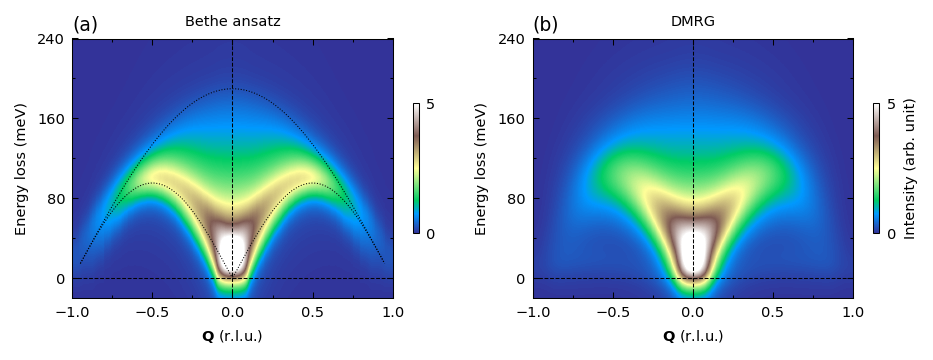

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(6.75,6.75/3), sharex=True, sharey=True, dpi=150,
                        gridspec_kw=dict(top=0.92, right=0.95, bottom=0.15, left=0.1, wspace=0.15))

# Bethe ansatz
spectra = calc_Bethe_ansatz
art = axs[0].imshow(spectra['S']*2*30, origin='lower', aspect='auto', cmap='terrain', vmin=0., vmax=5,
                    extent=[spectra['Q'][0], spectra['Q'][-1], spectra['E'][0], spectra['E'][-1]])
axs[0].plot(bd[:,0], bd[:,1],':k', lw=0.5)
axs[0].plot(bd[:,0], bd[:,2],':k', lw=0.5)
cbar1 = plt.colorbar(art, shrink=0.5, ax=axs[0])

# DMRG
spectra = calc_DMRG
art = axs[1].imshow(spectra['S']*2, origin='lower', aspect='auto', cmap='terrain', vmin=0., vmax=5,
                    extent=[spectra['Q'][0], spectra['Q'][-1], spectra['E'][0], spectra['E'][-1]])
cbar2 = plt.colorbar(art, shrink=0.5, ax=axs[1])

# axis control
axs[0].set_xlim(-1.,1.)
axs[0].set_ylim(-20,240)
axs[0].set_xticks(np.arange(-1,1.1,0.5))
axs[0].set_yticks(np.arange(0,241,80))
axs[0].set_title('Bethe ansatz', fontsize=7)
axs[1].set_title('DMRG', fontsize=7)
for ax in axs:
    ax.set_xlabel(r'$\mathbf{Q}$ (r.l.u.)')
    ax.set_ylabel('Energy loss (meV)')
    ax.axhline(y=0, lw=0.5, ls='--', color='k')
    ax.axvline(x=0, lw=0.5, ls='--', color='k')
    make_theme(ax)
    ax.tick_params(labelleft=True)

for cbar in [cbar1,cbar2]:
    cbar.outline.set_linewidth(0.5)
    cbar.set_ticks([0,5])
    cbar.ax.tick_params(width=0.5, labelsize=7, length=0)
cbar2.set_label('Intensity (arb. unit)')

plot_label(axs[0], '(a)')
plot_label(axs[1], '(b)')